# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Python Installation**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.

## Implementing Trading with Machine Learning Regression-Part-3
In the previous notebook, we have covered data preprocessing. We have also predicted high and low values. This notebook will create signals and compare strategy returns over GLD returns.
![image.png](https://d2a032ejo53cab.cloudfront.net/Glossary/xX83CP3F/p-3.drawio.png)


This notebook will generate a trading strategy using the high, and low prices predicted using the linear regression model. Following this, we will study the strategy performance.
The key steps are:
1. [Import the Data](#import)
2. [Signal Generation](#returns)
3. [Plotting GLD Returns and Strategy Returns](#plot)

In [1]:
## Import the libraries
import numpy as np
import pandas as pd

# For Plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid') 

# To ignore unwanted warnings
import warnings
warnings.filterwarnings("ignore")

<a id='import'></a>
## Import the Data
We import the `test_dataset_pred_high_low.csv`. It has gold prices data with predicted high and predicted low values calculated using the linear regression model.

In [2]:
# Importing the data
test_dataset = pd.read_csv(
    '../data_modules/test_dataset_pred_high_low.csv', index_col='Date')

# Converting index into datetime format
test_dataset.index = pd.to_datetime(test_dataset.index)

# Printing the tail of test_dataset
test_dataset.tail()

,Close,High,P_H,Low,P_L
Date,,,,,
2019-05-08,120.910004,121.540001,122.061923,120.769997,121.001003
2019-05-09,121.199997,121.620003,121.486835,120.860001,120.423104
2019-05-10,121.430000,121.730003,121.944117,121.300003,120.876820
2019-05-13,122.669998,122.849998,123.153937,122.330002,122.085799
2019-05-14,122.459999,122.660004,123.093834,122.120003,122.049181


<a id='returns'></a>
## Signal Generation

We will use the predicted high and predicted low values to determine whether to buy or sell GLD ETF the next day.

We will sell GLD ETF when
1. The actual high value is greater than the predicted high value. 
2. The actual low value is greater than the predicted low value.

We will buy GLD ETF when 
1. The actual high value is less than the predicted high value.  
2. The actual low value is less than the predicted low value.

For more details about signal generation, please refer to [Section 7, Unit 1](https://quantra.quantinsti.com/startCourseDetails?cid=43&section_no=7&unit_no=1&course_type=paid&unit_type=Video)



In [3]:
# Initialising signal column to be zero
test_dataset['Signal'] = 0

# When selling, assigning signal value as -1
test_dataset.loc[(test_dataset['High'] > test_dataset['P_H']) & (
    test_dataset['Low'] > test_dataset['P_L']), 'Signal'] = -1

# When buying, assigning signal value as +1
test_dataset.loc[(test_dataset['High'] < test_dataset['P_H']) & (
    test_dataset['Low'] < test_dataset['P_L']), 'Signal'] = 1

## Strategy Returns
Here, we will compute the GLD returns and strategy returns.

`gld_returns` are simply calculated using percentage change in two consecutive `Close`.

For `test_dataset` we use `Signal` of last day and `gld_returns`.

In [4]:
# Compute GLD returns
test_dataset['gld_returns'] = test_dataset['Close'].pct_change()

# Compute strategy returns
test_dataset['strategy_returns'] = test_dataset['gld_returns'] * \
    (test_dataset['Signal'].shift(1))

# Printing tail of the test_dataset
test_dataset.tail()

#Saving the test_dataset as ml_regression_gld_strategy_data.csv for further analysis
test_dataset.to_csv('ml_regression_gld_strategy_data.csv', index = True)

<a id='plot'></a>
## Plot the GLD Returns and Strategy Returns
Here we will plot `gld_returns` and `test_dataset` in one plot for comparison.

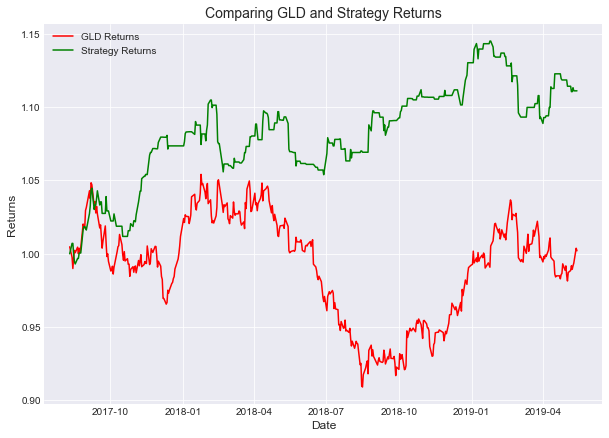

In [5]:
plt.figure(figsize=(10, 7))

# Plotting gld_returns
plt.plot(((test_dataset['gld_returns'][:]+1).cumprod()),
         color='r', label='GLD Returns')

# Plotting test_dataset
plt.plot(((test_dataset['strategy_returns'][:]+1).cumprod()),
         color='g', label='Strategy Returns')

# x-labeling
plt.xlabel('Date', fontsize=12)

# y-labeling
plt.ylabel('Returns', fontsize=12)

# Titlename
plt.title('Comparing GLD and Strategy Returns', fontsize=14)
plt.legend()
plt.show()

From the above plot, it is clear that `strategy_returns` outperform the `gld_returns`.


## Conclusion

In this notebook, we performed signal generation using predicted high and low constraints and compared the strategy returns with GLD returns. In the following notebook, we will compute the strategy's performance and visualize the long and short positions of trades.<br><br>

